# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [2]:
DATA_PATH = "./data/data.tsv.gz"

df = pd.read_csv(DATA_PATH, compression='gzip', header=0, sep ="\t", on_bad_lines='skip')
df

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13492,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13493,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,2
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


We load the data from the compressed file into a dataframe using read_csv. We set on_bad_lines to "skip" in order to ignore ill-formated lines as instructed.

In [3]:
df.nunique()

condition                   2
id                      13488
baseline_motorcycle1    11480
update_motorcycle1      12965
baseline_motorcycle2     4948
update_motorcycle2       5544
baseline_motorcycle3     1190
update_motorcycle3       1265
baseline_motorcycle4      316
update_motorcycle4        325
motorcycle_count            4
dtype: int64

### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

##### 2.1 - Unique ID

In [4]:
print(f'Before - ID are unique: {df["id"].is_unique}')

size_before = len(df)
df = df.drop_duplicates(subset=['id'], keep='first',ignore_index=True)
size_after = len(df)
print(f'After  - ID are unique: {df["id"].is_unique}')

print(f'We dropped {size_before - size_after} row(s)')

Before - ID are unique: False
After  - ID are unique: True
We dropped 9 row(s)


In order to drop duplicates we use the panda drop_duplicates function. "subset" allow us to specify in which column we want to search for duplicates, keep='first' specify that we want to keep the first of the duplicates as instructed. As we can see the IDs are not unique. We print the difference of size of the dataframe to know how much rows we dropped. We can see that after the process the IDs are indeed unique.

##### 2.2 - Number of vehicule sums up

In [5]:
baseline = df.filter(regex='^baseline',axis=1) #All columns corresponding to baseline motorcycles
update = df.filter(regex='^update',axis=1) #All columns corresponding to update motorcycles

baseline_count =  baseline.shape[1] - baseline.isnull().sum(axis=1) # Number of baseline motorcycles for each row
update_count =  update.shape[1] - update.isnull().sum(axis=1)

size_before = len(df)
df = df.drop(df[(update_count != baseline_count) | (df["motorcycle_count"] != baseline_count)].index)
size_after = len(df)

print(f'We dropped {size_before - size_after} row(s)')

We dropped 0 row(s)


We select the columns corresponding to the "baseline" and "update" contracts. We count the number of non-null fields. We drop any row that does not have the same number of vehicules between the baseline, update and total count. Apparently the conditions hold for every row, since we are not dropping any row.

##### 2.3 - Mean and median kilometrages

In [6]:
df.filter(regex='_motorcycle[1-4]$',axis=1).describe(percentiles=[0.5, 0.99])

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
count,1.348800e+04,1.348800e+04,5.648000e+03,5.648000e+03,1277.000000,1277.000000,326.000000,326.000000
mean,7.413998e+14,7.413998e+14,6.732597e+04,9.227763e+04,67657.320282,92849.408771,67827.975460,93374.279141
std,8.610457e+16,8.610457e+16,6.022646e+04,6.188369e+04,64419.001860,66547.920222,54610.217241,56345.386070
min,0.000000e+00,4.200000e+01,0.000000e+00,1.160000e+02,0.000000,155.000000,0.000000,622.000000
50%,5.634150e+04,8.239750e+04,5.615750e+04,8.206100e+04,58821.000000,85645.000000,68181.000000,93387.500000
99%,2.326934e+05,2.609947e+05,2.271233e+05,2.543654e+05,225513.360000,258405.320000,184187.750000,220859.750000
max,1.000000e+19,1.000000e+19,1.000581e+06,1.030915e+06,884594.000000,931105.000000,217715.000000,244658.000000


The maximums for the first 2 columns are clearly not plausible. After some online researchs we learn that a motorcycle with more than 100'000 kms are rarely found on second-hand website and so we can estimate that someone very conscientious, with help of some spare parts etc, could make his/her motorcycle last for 500'000 kms. Looking at the 99% percentiles we can confirm our guess. Indeed 99% of the motorcycle have below 300'000 kms. So removing all motorcycle above 500'000 kms seems quite appropriate.

In [7]:
size_before = len(df)
df = df.drop(df[(df["baseline_motorcycle1"] > 500_000) | (df["update_motorcycle1"] > 500_000)].index)
df = df.drop(df[(df["baseline_motorcycle2"] > 500_000) | (df["update_motorcycle2"] > 500_000)].index)
df = df.drop(df[(df["baseline_motorcycle3"] > 500_000) | (df["update_motorcycle3"] > 500_000)].index)
df = df.drop(df[(df["baseline_motorcycle4"] > 500_000) | (df["update_motorcycle4"] > 500_000)].index)
size_after = len(df)

print(f'We dropped {size_before - size_after} row(s) ie {(size_before - size_after) / size_before * 100}% of the data')


We dropped 17 row(s) ie 0.12603795966785292% of the data


In [8]:
print("Std: ")
df.filter(regex='_motorcycle[1-4]$',axis=1).std()
print("\nMean:")
print(df.filter(regex='motorcycle[1-4]$',axis=1).mean())
print("\nMedian:")
print(df.filter(regex='motorcycle[1-4]$',axis=1).median())

Std: 

Mean:
baseline_motorcycle1    66971.449855
update_motorcycle1      91902.370351
baseline_motorcycle2    66375.933984
update_motorcycle2      91337.725998
baseline_motorcycle3    66122.384736
update_motorcycle3      91306.289536
baseline_motorcycle4    67302.672840
update_motorcycle4      92752.799383
dtype: float64

Median:
baseline_motorcycle1    56229.0
update_motorcycle1      82345.0
baseline_motorcycle2    56083.0
update_motorcycle2      81941.0
baseline_motorcycle3    58141.0
update_motorcycle3      85299.0
baseline_motorcycle4    66747.0
update_motorcycle4      93165.5
dtype: float64


As we can see the means and medians are consistent between columns. The medians are generally lower than the means meaning that there are more motorcycles under the mean than above.

##### 2.4 - Using  median or mean to summarize numerical data with outliers?

In cases where the data must be summarized with its ouliers, we would prefer using the median as it is not sensitive to a small number of outliers. Having an abnormally large value in the data can significantly shift the mean whereas it can only shift the median by at most one place which would usually corresponds to a very small difference with enough data points. 

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
way: 
   - We could first calculate the average value per motorcycle within each policy and have one data point per policy 
   - Or we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset.   
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

##### 3.1 - New columns

In [9]:
df["baseline_average"]= df.filter(regex='baseline_motorcycle[1-4]$',axis=1).mean(axis =1)
df["update_average"]= df.filter(regex='update_motorcycle[1-4]$',axis=1).mean(axis =1)
df["diff_average"]= df["update_average"] - df["baseline_average"]
df[["baseline_average", "update_average", "diff_average"]]

,baseline_average,update_average,diff_average
0,896.0,39198.0,38302.0
1,27027.5,55558.0,28530.5
2,33169.0,48231.0,15062.0
3,23912.0,59136.0,35224.0
4,16862.0,59292.0,42430.0
...,...,...,...
13483,31680.5,54183.5,22503.0
13484,11536.5,41911.5,30375.0
13485,60190.0,86243.0,26053.0
13486,29884.0,35459.0,5575.0


We first create the baseline_average/update_average by averaging each baseline/update values for each row. Then diff_average column by taking the difference of the 2 previously created fields. Here is a sample of the three new columns.


##### 3.2 - Discussion aggregation

Instead of using the mean of each motorcycle kilometrage, we could decide to compute the minimum over all motorcycles of the augmentation (eg:+10%) from the baseline kilometrage to the update kilometrage. This idea comes from the fact that we know that individuals will lower the kilometrage of their motorcycles when lying to decrease their *insurance premium*. Assuming that the individual would not be tempted to lie on all his motorcycles but only on one of them, this could help us see a statistic that would otherwise be hidden in the average.  
Another interesting aggregating statistic would be to store the frequency of appearance of each digit in the update policy to see if their overall distribution over a *'sign at the top' / 'sign at the bottom'* experiment follows [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law) which is often used to detect fraud.

##### 3.3 - Motorcycle per policy

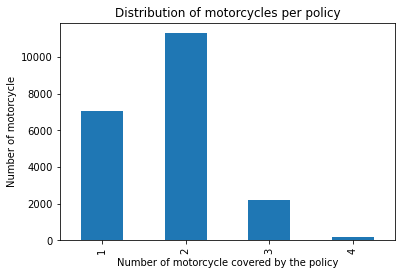

In [10]:
df.groupby("motorcycle_count")["motorcycle_count"].sum().plot(kind='bar', log=False, xlabel="Number of motorcycle covered by the policy", ylabel="Number of motorcycle")
plt.title("Distribution of motorcycles per policy")
plt.show()

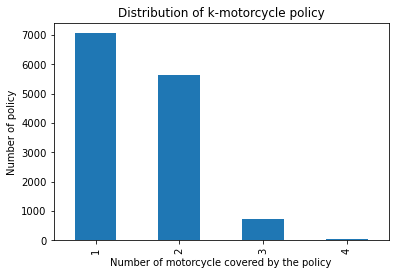

In [11]:
df.groupby("motorcycle_count")['id'].count().plot(kind='bar', log=False, xlabel="Number of motorcycle covered by the policy", ylabel="Number of policy")
plt.title("Distribution of k-motorcycle policy")
plt.show()

We display the number of policy per number of motorcycle in it. As we can see the majority of policy have only one motorcycle. But a majority of motorcycle are in a policy with two motorcycles.


##### 3.4 - Mean and std of update_average

In [12]:
print(f'Mean of update_average: {df["update_average"].mean():.3f}')
print(f'Standard deviation of update_average: {df["update_average"].std():.3f}')

Mean of update_average: 91689.940
Standard deviation of update_average: 49730.561


We computed the mean of the update average which is not the global update_mean since motorcycles that are alone in a policy have a greater weight in the average than the ones in multiple motorcycles policy.

##### 3.5 - Mean and std for 4 motorcycles policies

In [13]:
mean_per_motorcycle = df[df["motorcycle_count"] == 4]["update_average"].mean()
print(f'Mean of update_kilometrage per motorcycle for policy with 4 motorcycles: {mean_per_motorcycle:.3f}km')

std_per_motorcycle = df[df["motorcycle_count"] == 4]["update_average"].std()
print(f'Standard deviation of update_kilometrage per motorcycle for policy with 4 motorcycles: {std_per_motorcycle:.3f}km')

Mean of update_kilometrage per motorcycle for policy with 4 motorcycles: 105366.220km
Standard deviation of update_kilometrage per motorcycle for policy with 4 motorcycles: 38197.343km


We keep all policies with 4 motorcycles then we compute the mean/std deviation of the update_average. Since we select all the policies with 4 motorcycle the mean is not weighted.


##### 3.6 - Discussion: aggregate the data per motorcycles or per policies

In [14]:
print(f'Mean of update_kilometrage per motorcycle for policy with 1 motorcycles {df[df["motorcycle_count"] == 1]["update_average"].mean()}')
print(f'Std of update_kilometrage per motorcycle for policy with 1 motorcycles {df[df["motorcycle_count"] == 1]["update_average"].std()}\n')
print(f'Mean of update_kilometrage per motorcycle for policy with 2 motorcycles {df[df["motorcycle_count"] == 2]["update_average"].mean()}')
print(f'Std of update_kilometrage per motorcycle for policy with 2 motorcycles {df[df["motorcycle_count"] == 2]["update_average"].std()}\n')
print(f'Mean of update_kilometrage per motorcycle for policy with 3 motorcycles {df[df["motorcycle_count"] == 3]["update_average"].mean()}')
print(f'Std of update_kilometrage per motorcycle for policy with 3 motorcycles {df[df["motorcycle_count"] == 3]["update_average"].std()}\n')
print(f'Mean of update_kilometrage per motorcycle for policy with 4 motorcycles {df[df["motorcycle_count"] == 4]["update_average"].mean()}')
print(f'Std of update_kilometrage per motorcycle for policy with 4 motorcycles {df[df["motorcycle_count"] == 4]["update_average"].std()}')

Mean of update_kilometrage per motorcycle for policy with 1 motorcycles 91750.71768707484
Std of update_kilometrage per motorcycle for policy with 1 motorcycles 56346.708221136076

Mean of update_kilometrage per motorcycle for policy with 2 motorcycles 91509.6892945764
Std of update_kilometrage per motorcycle for policy with 2 motorcycles 41496.47416801956

Mean of update_kilometrage per motorcycle for policy with 3 motorcycles 91708.70725034196
Std of update_kilometrage per motorcycle for policy with 3 motorcycles 39384.17723651962

Mean of update_kilometrage per motorcycle for policy with 4 motorcycles 105366.22023809524
Std of update_kilometrage per motorcycle for policy with 4 motorcycles 38197.34272986235


As we can see from those means, the behaviour of motorcyclisthaving a different number of motorcyles in their contracts is not uniform. Motorcyclist with 4 motorcycles in their policy tend to have a longer kilometrage than the other motorcyclists. Calculating the average value per motorcycle within each policy and having one data point per policy would remove this information and lead to biases in the distribution of kilometrage. Furhermore, the standard-deviation of policies with a different number of motorcycles greatly vary which would emphasize the previously discussed issue. 
As a conclusion, we would suggest analyzing the data at the motorcycle level and having one data point per motorcycle in the dataset to lose as little information as possible.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

##### 4.1 - Mean and std of different signature locations in update

In [15]:
update_average_top_mean =  df[df['condition']=='Sign Top']['update_average'].mean()
update_average_bottom_mean =  df[df['condition']=='Sign Bottom']['update_average'].mean()
update_average_top_std =  df[df['condition']=='Sign Top']['update_average'].std()
update_average_bottom_std =  df[df['condition']=='Sign Bottom']['update_average'].std()
print(f'Average of sign top policies: {update_average_top_mean:.3f}')
print(f'Average of sign bottom policies: {update_average_bottom_mean:.3f}')
print(f'Standard deviation of sign top policies: {update_average_top_std:.3f}')
print(f'Standard deviation of sign bottom policies: {update_average_bottom_std:.3f}')

Average of sign top policies: 85439.578
Average of sign bottom policies: 98097.218
Standard deviation of sign top policies: 49014.992
Standard deviation of sign bottom policies: 49646.961


We first compute the mean and standard deviation of update_average for contract that were signed at the top / signed at the bottom. We see see that the average kilometrage for people who signed at the top of the contract is lower than the one's who signed at the bottom. Our hypothesis was contrary to this fact but we have not yet computed the statistical significance of this difference

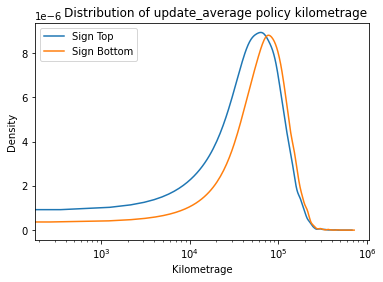

In [16]:
df[df['condition']=='Sign Top']['update_average'].plot.kde(label='Sign Top')
df[df['condition']=='Sign Bottom']['update_average'].plot.kde(label='Sign Bottom')
plt.semilogx()
plt.xlabel('Kilometrage')
plt.title('       Distribution of update_average policy kilometrage')
plt.legend()
plt.show()

We used a log-scale on the x-axis to emphasize the difference in distribution between the probabilities which could not be see on a linear scale due to the large difference in average kilometrage. At first sight, the distribution functions between the two signing types seem very similar but intuitions are not enough and a statistical test is necessary to quantify this difference.


##### 4.2 Determine difference significance between signature locations

To determine the difference significance, we use a one-sided t-test where the null hypothesis is that the average of the sign bottom kilometrage is lower than the average of the sign top kilometrage. We will also specify to the model that the variance of the two distributions may not be equal. Since statsmodel does not provide a one-sided hypothesis test, we can interpret the p-value as a one sided test by reject the null hypothesis of a greater-than test when p/2 < alpha. We will reject the null hypothesis with a confidence of 95% (if the p-value is below 0.10 due to having a one-sided test). It is to be noted that in our case, both one-sided and two-sided test lead to the same conclusion.

In [17]:
statistic, p_value = stats.ttest_ind(df[df['condition']=='Sign Bottom']['update_average'],df[df['condition']=='Sign Top']['update_average'],equal_var=False)
print(f'The difference is significant with a p-value of {p_value}' if(p_value/2<0.05) else 'The difference is not significant')

The difference is significant with a p-value of 9.862715086781334e-50


##### 4.3 - Does signing at the top decrease dishonesty?

Assuming the location where the person had to sign in the contract is the only variable varying between both studies, we can, with a confidence above 95%, state that signing at the top does not lead to a kilometrage distribution with a smaller mean than the one produced by signing at the bottom.

##### 4.4 - Difference the average values between sign at the top vs. sign at the bottom?

Given that no intervention was performed in the baseline contract, and that policies were randomly split into the two groups, we would expected both samples to come from the same distribution. As a consequence, we would not expect any significant differences between the average values between *sign at the top* vs. *sign at the bottom* conditions for the baseline contract.

##### 4.5 - Mean and std of different signature locations in baseline

In [18]:
baseline_average_top_mean =  df[df['condition']=='Sign Top']['baseline_average'].mean()
baseline_average_bottom_mean =  df[df['condition']=='Sign Bottom']['baseline_average'].mean()
baseline_average_top_std =  df[df['condition']=='Sign Top']['baseline_average'].std()
baseline_average_bottom_std =  df[df['condition']=='Sign Bottom']['baseline_average'].std()
print(f'Average of sign top policies: {baseline_average_top_mean:.3f}')
print(f'Average of sign bottom policies: {baseline_average_bottom_mean:.3f}')
print(f'Standard deviation of sign top policies: {baseline_average_top_std:.3f}')
print(f'Standard deviation of sign bottom policies: {baseline_average_bottom_std:.3f}')

Average of sign top policies: 59339.012
Average of sign bottom policies: 74427.842
Standard deviation of sign top policies: 47132.613
Standard deviation of sign bottom policies: 47909.077


We first compute the mean and standard deviation of baseline_average for contract that were signed at the top / signed at the bottom. We see see that the average kilometrage for people who signed at the top of the contract is quite lower than the one of those who signed at the bottom which contradicts our assumptions (signing at the top decreases dishonesty).

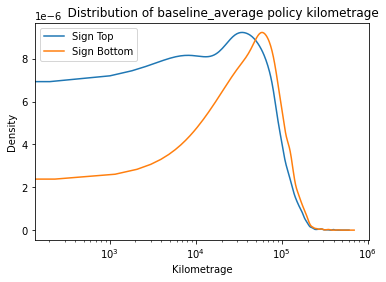

In [19]:
df[df['condition']=='Sign Top']['baseline_average'].plot.kde(label='Sign Top')
df[df['condition']=='Sign Bottom']['baseline_average'].plot.kde(label='Sign Bottom')
plt.semilogx()
plt.xlabel('Kilometrage')
plt.title('           Distribution of baseline_average policy kilometrage')
plt.legend()
plt.show()

As we can see from this plot, contrary to what would be expected, the distributions of both baseline_average policy is very different depending on the signature location. This is a first indication that the data has been tampered with.

##### 4.6 -Determine difference significance between signature locations

To investigate the significance of this difference, we will use a [Kolmogorov–Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) which is a nonparametric test of the equality of probability distributions of two samples. Therefore, in this test, the null-hypothesis is that the baseline_average kilometrage come from the same distribution.

In [20]:
statistic, p_value = stats.ks_2samp(df[df['condition']=='Sign Top']['baseline_average'],df[df['condition']=='Sign Bottom']['baseline_average'])
print(f'The difference is significant with a p_value of {p_value}' if(p_value<0.05) else 'The difference is not significant')

The difference is significant with a p_value of 1.8056945654173075e-70


We can therefore with high confidence reject the hypothesis that the signed-at-top and signed-at-bottom samples come from the same distribution and conclude that the data was not generated as indicated.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

##### 5.1 Distribution

In [21]:
baseline = df.filter(regex='^baseline',axis=1) #All columns corresponding to baseline motorcycles
update   = df.filter(regex='^update'  ,axis=1) #All columns corresponding to update motorcycles

bs1 = baseline["baseline_motorcycle1"]
mc1 = update["update_motorcycle1"]

In [22]:
print(bs1.describe(percentiles=[0.1, 0.25, 0.5, 0.75]))
print()
print(mc1.describe(percentiles=[0.1, 0.25, 0.5, 0.75]))

count     13471.000000
mean      66971.449855
std       54548.512879
min           0.000000
10%        5610.000000
25%       25248.500000
50%       56229.000000
75%       96089.000000
max      463090.000000
Name: baseline_motorcycle1, dtype: float64

count     13471.000000
mean      91902.370351
std       56443.828536
min          42.000000
10%       29549.000000
25%       50077.000000
50%       82345.000000
75%      123184.000000
max      477843.000000
Name: update_motorcycle1, dtype: float64


In [23]:
print("There are " + str(len(baseline[bs1 == 0])) + " 0-values for baseline1")
print("these are not in the histogram.")

There are 117 0-values for baseline1
these are not in the histogram.


There are 117 0-values for baseline1, which are not plottable in this log-scale histogram.\
This must not be forgotten, but does not change the general shape of the histogram.

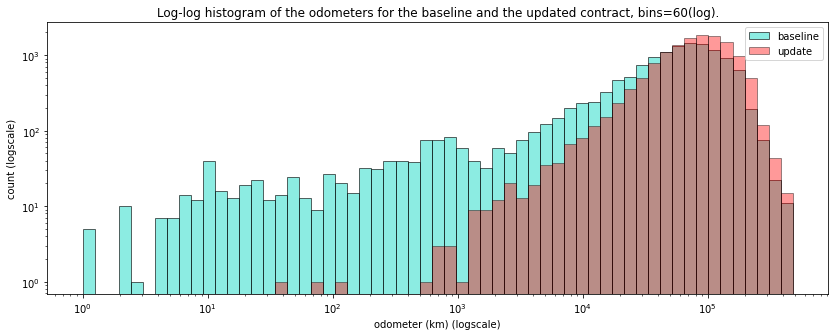

In [24]:
fig, ax = plt.subplots(1,1, figsize=(14,5))

bin_length_5_1 = 60
logbins5_1 = np.logspace(0, np.log10(max(bs1.max(), mc1.max())), bin_length_5_1)
plt.hist(bs1, color = 'turquoise', edgecolor = 'black', bins = logbins5_1, alpha = 0.6, label='baseline')
plt.hist(mc1, color = 'r', edgecolor='black', bins=logbins5_1, alpha=0.4, label='update')

plt.xscale('log')
plt.xlabel('odometer (km) (logscale)')

plt.yscale('log')
plt.ylabel('count (logscale)')

plt.title('Log-log histogram of the odometers for the baseline and the updated contract, bins='\
          +str(bin_length_5_1)+"(log).")

_ = plt.legend()

The distribution of values for the updated contract is way tighter, on a log scale, with almost no small values, i.e. the graph is shifted twoards the right —note it could be expected from the quantiles.

If we took the data at face value (i.e. no liars or tampering), this would mean that after  signing the baseline contract, people who had low mileage started driving way more.

##### 5.2 Differences

In [25]:
differences = (update["update_motorcycle1"] - baseline["baseline_motorcycle1"])

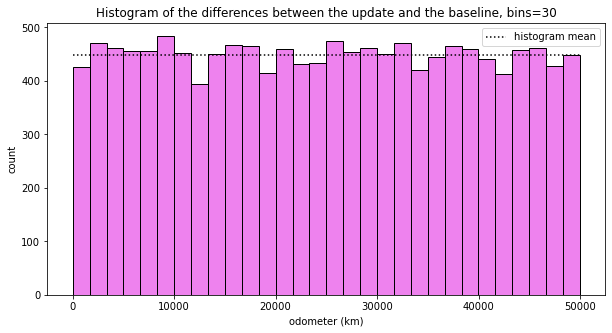

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

bins5_2 = 30
hist = plt.hist(differences, color='violet', edgecolor='black', bins=bins5_2)

plt.xlabel('odometer (km)')
plt.ylabel('count')


plt.hlines(hist[0].mean(), xmin=0, xmax=50000, colors='black', linestyles='dotted', label='histogram mean')

plt.legend()
_ = plt.title('Histogram of the differences between the update and the baseline, bins='+str(bins5_2))

In [27]:
tmp = differences.groupby(differences)
print(tmp.count())
print("\nThere are "+ str(differences.count())+ " differences in total.")

8        1
10       1
15       1
18       1
24       1
        ..
49970    1
49975    1
49982    1
49986    1
49997    1
Length: 11874, dtype: int64

There are 13471 differences in total.


In [28]:
differences.describe()

count    13471.000000
mean     24930.920496
std      14422.649619
min          8.000000
25%      12278.000000
50%      25043.000000
75%      37388.000000
max      49997.000000
dtype: float64

In [29]:
print("The minimum difference is " + str(differences.min()) \
      + " which has " + str(tmp.get_group(differences.min()).count()) + " occurence(s). ")

print("The maximum difference is "+ str(differences.max()) + \
      " which has " + str(tmp.get_group(differences.max()).count()) + " occurence(s).")
      
print("The smallest and highest difference are only situated to 2 standard deviations from the mean")

The minimum difference is 8 which has 1 occurence(s). 
The maximum difference is 49997 which has 1 occurence(s).
The smallest and highest difference are only situated to 2 standard deviations from the mean


##### 5.3 Origin of data

We expect the distance distribution to be a bell curve cf [this article, page 382](https://www.researchgate.net/publication/325085735_Impact_of_Battery_Size_and_Energy_Cost_on_the_Market_Acceptance_of_Blended_Plug-in_Hybrid_Electric_Vehicles), which the violet plot(see cell 26) is clearly not.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

##### 6.1 Distribution of last 3 digits

In [30]:
# Computations

# baseline
bs_3digits = baseline.loc[:, "baseline_motorcycle1"].copy()
bs_3digits = bs_3digits.apply(lambda x: x%1000)

# update
update_3digits = update.loc[:, "update_motorcycle1"].copy()
update_3digits = update_3digits.apply(lambda x: x% 1000)

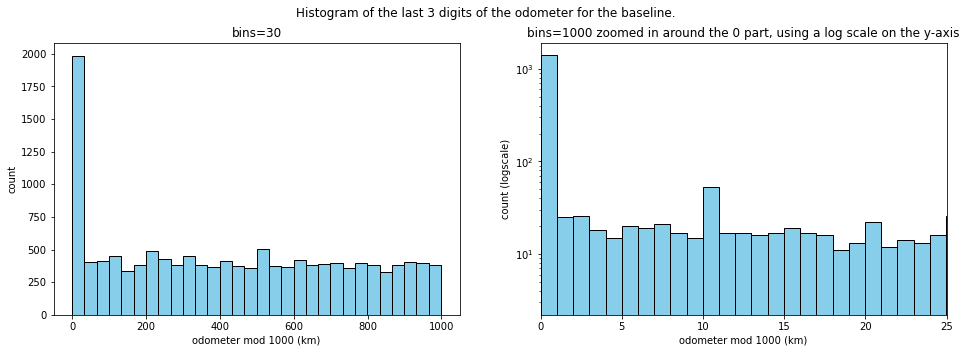

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Histogram of the last 3 digits of the odometer for the baseline.')

# plot 1
bins6_1b = 30
ax1.hist(bs_3digits, color = 'skyblue', edgecolor = 'black', bins = bins6_1b)

ax1.set_xlabel('odometer mod 1000 (km)')
ax1.set_ylabel('count')

ax1.set_title('bins='+str(bins6_1b))


#plot 2

bins6_1b2 = 1000
ax2.hist(bs_3digits, color = 'skyblue', edgecolor = 'black', bins = bins6_1b2)

ax2.set_xlabel('odometer mod 1000 (km)')
ax2.set_yscale('log')
ax2.set_ylabel('count (logscale)')

ax2.set_xlim(0, 25)
_ = ax2.set_title('bins=' + str(bins6_1b2) + ' zoomed in around the 0 part, using a log scale on the y-axis')

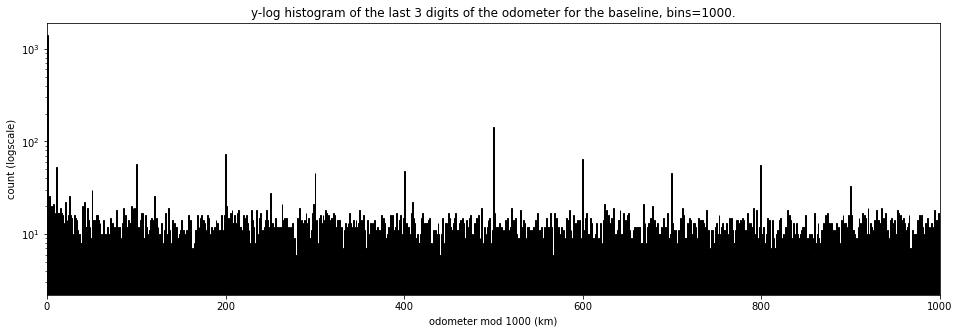

In [32]:
fig, ax = plt.subplots(1,1, figsize=(16,5))

bins6_1b2 = 1000
plt.hist(bs_3digits, color = 'skyblue', edgecolor = 'black', bins = bins6_1b2)

plt.xlabel('odometer mod 1000 (km)')
plt.yscale('log')
plt.ylabel('count (logscale)')

plt.xlim(0, 1000)
_ = plt.title('y-log histogram of the last 3 digits of the odometer for the baseline, bins=1000.')

In [33]:
print(len(bs1[bs_3digits == 0]))
print(len(bs1[bs_3digits == 1]))
print(str(len(bs1[bs_3digits == 0]) / len(bs1) * 100) + '%')

1397
25
10.370425358176824%


There is quite a peak at 0, while the rest of the odometer distribution seems uniform. About 10% of the baseline contract odometer values are congruent to $0 \bmod 1000$.

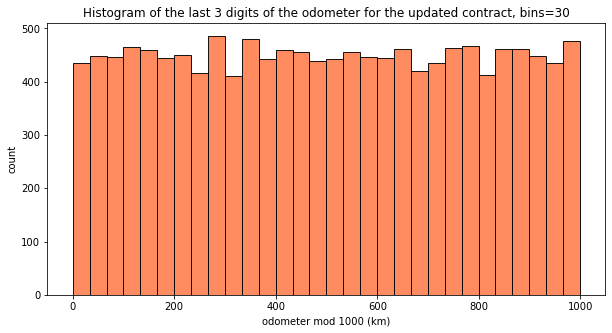

In [34]:
# plot update
fig, ax = plt.subplots(1,1, figsize=(10,5))

bins6_1u = 30
plt.hist(update_3digits, color='coral', edgecolor='black', bins=bins6_1u, alpha=0.9)

plt.xlabel('odometer mod 1000 (km)')
plt.ylabel('count')

_ = plt.title('Histogram of the last 3 digits of the odometer for the updated contract, bins='+str(bins6_1u))

##### 6.2 Differences between distributions

In [35]:
tmp1 = len(baseline[bs1 > 999])
tmp2 = len(baseline[bs1 <= 999])
print(tmp1) 
print(tmp2) 
print(str(tmp2 / tmp1 * 100) + " %")

12627
844
6.6840896491644886 %


We can see that the two distribution are not the same.
* The last 3 digits of the updated data are distributed rather evenly among the span 0-999, which is not unexpected: for the data which is above 999, i.e. most of it, we don't have an a priori distribution on the last digits.
* The last 3 digits of the baseline contract odometer values are also evenly distributed, *except* for a huge peak at $000$, where 10% of the weight (instead of the expected 0.1% on average) is based, and some smaller peaks at 100, 200, ..., 900.
* In summary, both distribution are similar, *except* for the very big difference at $000$, and some smaller differences on "round numbers". But then there is something surprising: the updated distribution, for signed-bottom contracts, should be the same as the baseline distribution, and therefore show the same peak. Since it doesn't, this would mean that it was compensated by updated-signed-top contracts. By plotting histograms of the updated contract mod 1000, separated based on the signature position, we see that is not the case.

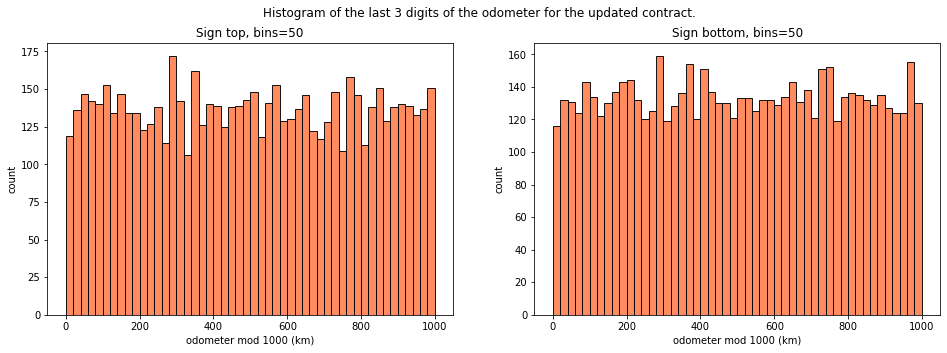

In [36]:
tmp = df.filter(regex='^update|^condition', axis=1)
tmp[tmp["condition"]=="Sign Top"]["update_motorcycle1"]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Histogram of the last 3 digits of the odometer for the updated contract.')

# left plot, signe top
bins6_1u = 50
ax1.hist(tmp[tmp["condition"]=="Sign Top"]["update_motorcycle1"] % 1000, color='coral', edgecolor='black', bins=bins6_1u, alpha=0.9)

ax1.set_xlabel('odometer mod 1000 (km)')
ax1.set_ylabel('count')

_ = ax1.set_title('Sign top, bins='+str(bins6_1u))

# right plot, sign bottom
ax2.hist(tmp[tmp["condition"]=="Sign Bottom"]["update_motorcycle1"] % 1000, color='coral', edgecolor='black', bins=bins6_1u, alpha=0.9)

ax2.set_xlabel('odometer mod 1000 (km)')
ax2.set_ylabel('count')

_ = ax2.set_title('Sign bottom, bins='+str(bins6_1u))

##### 6.3 Origin of differences

A plausible explanations for the peak at $000$ mod $1000$ in the baseline distribution, is that people would tend to round their odometer kilometrage. This hypothesis is supported by the multiple peaks we see on the black graph (cell 32) every hundred, and in particular at $500$ and $1000$, which are common numbers for people to round to.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

##### 7.1 Load the data

In [37]:
fonts = pd.read_csv("./data/fonts.csv")
fonts

,id,font
0,1,Helvetica
1,2,Helvetica
2,3,Helvetica
3,4,Helvetica
4,5,Arial
...,...,...
13482,13484,Arial
13483,13485,Helvetica
13484,13486,Helvetica
13485,13487,Helvetica


In [38]:
# check there are really only 2 fonts.
print((fonts.nunique()))

id      13487
font        2
dtype: int64


##### 7.2 Kilometers

In [39]:
#filter rows by font
#filter rows by font
df_merge_fonts = df.merge(fonts,on="id")

arial_rows = df_merge_fonts[df_merge_fonts["font"] == "Arial"]
helvetica_rows = df_merge_fonts[df_merge_fonts["font"] == "Helvetica"]

print("The number of rows with arial font is " + str(len(arial_rows)))
print("The number of rows with helvetica font is " + str(len(helvetica_rows)))

The number of rows with arial font is 6737
The number of rows with helvetica font is 6734


The number of rows with arial font is 6737\
The number of rows with helvetica font is 6734


In [40]:
arial_rows

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial
5,Sign Top,6,147738,167895,125820.0,164688.0,NaN,NaN,NaN,NaN,2,136779.0,166291.5,29512.5,Arial
6,Sign Bottom,7,18780,49811,45402.0,54824.0,NaN,NaN,NaN,NaN,2,32091.0,52317.5,20226.5,Arial
7,Sign Top,8,41930,80323,181416.0,229852.0,NaN,NaN,NaN,NaN,2,111673.0,155087.5,43414.5,Arial
9,Sign Bottom,10,78382,127817,NaN,NaN,NaN,NaN,NaN,NaN,1,78382.0,127817.0,49435.0,Arial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,Sign Top,13477,0,3630,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,3630.0,3630.0,Arial
13460,Sign Bottom,13478,100467,117836,NaN,NaN,20.0,32650.0,NaN,NaN,2,50243.5,75243.0,24999.5,Arial
13461,Sign Top,13479,250,10476,NaN,NaN,NaN,NaN,NaN,NaN,1,250.0,10476.0,10226.0,Arial
13463,Sign Bottom,13481,59624,71545,NaN,NaN,NaN,NaN,140198.0,151643.0,2,99911.0,111594.0,11683.0,Arial


In [41]:
arial_baseline = arial_rows.filter(regex='^baseline|id' ,axis=1)
helvetica_baseline = helvetica_rows.filter(regex='^baseline|id' ,axis=1)

In [42]:
arial_baseline.describe()

,id,baseline_motorcycle1,baseline_motorcycle2,baseline_motorcycle3,baseline_motorcycle4,baseline_average
count,6737.000000,6737.000000,2819.000000,636.000000,162.000000,6737.000000
mean,6714.309336,66761.746326,66142.794253,65839.216981,66962.172840,66570.995262
std,3908.411917,54682.970622,53242.575881,55654.845850,54301.551388,48237.684925
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3307.000000,25000.000000,24087.000000,17875.500000,13951.250000,30899.500000
50%,6730.000000,56000.000000,56000.000000,57999.000000,66683.000000,59359.000000
75%,10073.000000,95888.000000,96764.000000,99791.000000,105881.750000,91834.500000
max,13484.000000,463090.000000,353700.000000,269851.000000,216874.000000,463090.000000


In [43]:
helvetica_baseline.describe()

,id,baseline_motorcycle1,baseline_motorcycle2,baseline_motorcycle3,baseline_motorcycle4,baseline_average
count,6734.000000,6734.000000,2816.000000,635.000000,162.000000,6734.000000
mean,6774.070538,67181.246807,66609.322088,66405.998425,67643.172840,67008.900889
std,3877.660764,54416.914699,53242.857891,55673.854257,54595.904339,47986.541132
min,1.000000,6.000000,24.000000,67.000000,89.000000,6.000000
25%,3444.250000,25607.500000,24655.500000,18727.000000,14496.000000,31357.625000
50%,6760.500000,56455.000000,56292.000000,58821.000000,67048.000000,59914.000000
75%,10156.750000,96312.500000,96836.250000,100351.500000,106506.750000,92349.708333
max,13488.000000,444290.000000,353818.000000,270274.000000,217715.000000,444290.000000


In [44]:
print("arial:     " + str(len(arial_baseline[arial_baseline["baseline_motorcycle1"] == 0])))
print("helvetica: " + str(len(helvetica_baseline[helvetica_baseline["baseline_motorcycle1"] == 0])))

arial:     117
helvetica: 0


It is notable, even strange that every baseline motorcycle 1, with helvetica font, happen to have been used while more than 100 haven't, with the arial font —recall there are basically the same number of motorcycle of these 2 types.

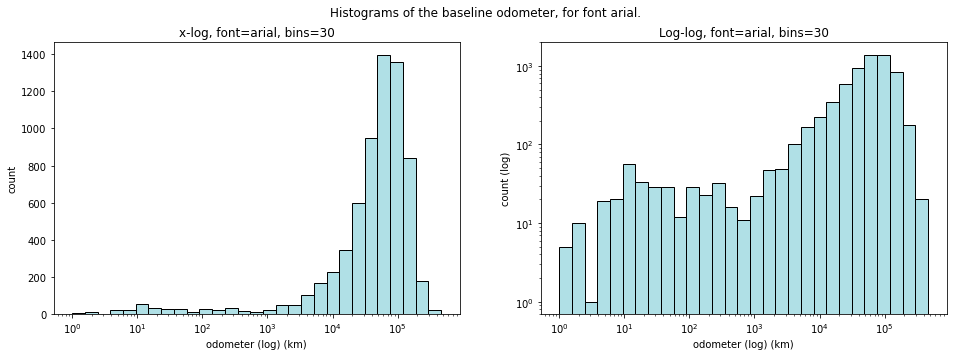

In [45]:
# bins
bin_length7_2arial = 30
bins7_2arial = np.logspace(0, np.log10(arial_baseline["baseline_motorcycle1"].max()), bin_length7_2arial)

# frame
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Histograms of the baseline odometer, for font arial.')

# left plot
ax1.hist(arial_baseline["baseline_motorcycle1"], color='powderblue', edgecolor='black', bins=bins7_2arial)

ax1.set_xlabel('odometer (log) (km)')
ax1.set_xscale('log')

ax1.set_ylabel('count')

_ = ax1.set_title('x-log, font=arial, bins='+str(bin_length7_2arial))


# right plot
ax2.hist(arial_baseline["baseline_motorcycle1"], color='powderblue', edgecolor='black', bins=bins7_2arial)

ax2.set_xlabel('odometer (log) (km)')
ax2.set_xscale('log')

ax2.set_ylabel('count (log)')
plt.yscale('log')

_ = ax2.set_title('Log-log, font=arial, bins='+str(bin_length7_2arial))

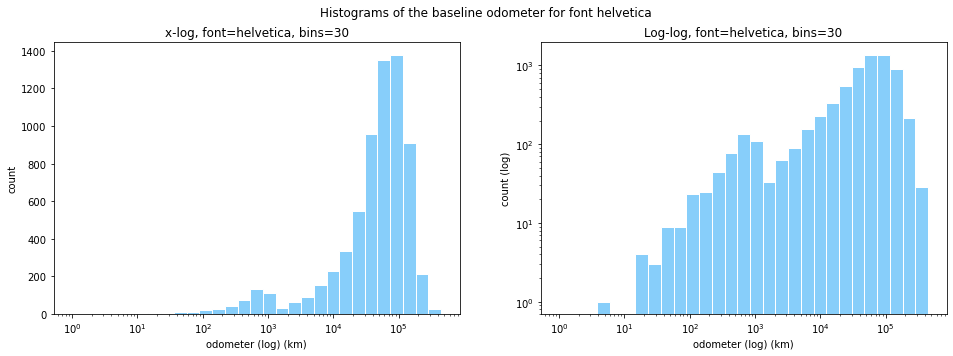

In [46]:
# bins
bin_length7_2helvetica = 30
bins7_2helvetica = np.logspace(0, np.log10(helvetica_baseline["baseline_motorcycle1"].max()), bin_length7_2helvetica)

# frame
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Histograms of the baseline odometer for font helvetica')

# left plot, x-log
ax1.hist(helvetica_baseline["baseline_motorcycle1"], color='lightskyblue',\
         edgecolor='white', bins=bins7_2helvetica)

ax1.set_xlabel('odometer (log) (km)')
ax1.set_xscale('log')

ax1.set_ylabel('count')

ax1.set_title('x-log, font=helvetica, bins='+str(bin_length7_2helvetica))


# right plot, log-log
ax2.hist(helvetica_baseline["baseline_motorcycle1"], color='lightskyblue',\
         edgecolor='white', bins=bins7_2helvetica)

ax2.set_xlabel('odometer (log) (km)')
ax2.set_xscale('log')

ax2.set_ylabel('count (log)')
ax2.set_yscale('log')

_ = ax2.set_title('Log-log, font=helvetica, bins='+str(bin_length7_2helvetica))

Previously we observed the helvetica font values had a strangely low number of 0-values.\
Here we can observe that this observation applies to not only 0, but to all small (<500km, at least) values.

In [47]:
threshold = 500

X = []
ratios_helv_tot = []
ratios_helv_arial = []
for threshold in range(100, 1001, 100):
    tmp_arial = arial_baseline[arial_baseline["baseline_motorcycle1"] < threshold]
    tmp_helvet = helvetica_baseline[helvetica_baseline["baseline_motorcycle1"] < threshold]
    X.append(threshold)
    ratios_helv_tot.append(len(tmp_helvet)/(len(tmp_helvet)+len(tmp_arial))*100)
    ratios_helv_arial.append(len(tmp_helvet)/len(tmp_arial)*100)
    print("threshold: " + str(threshold) + "km" +\
          ", count arial: " + str(len(tmp_arial)) +\
          ", count helvet: " + str(len(tmp_helvet)) +\
          ", ratio: " + str(len(tmp_helvet)/(len(tmp_helvet)+len(tmp_arial))*100) +" %")
X = np.array(X).reshape(-1, 1)

threshold: 100km, count arial: 334, count helvet: 30, ratio: 8.241758241758241 %
threshold: 200km, count arial: 371, count helvet: 68, ratio: 15.489749430523919 %
threshold: 300km, count arial: 406, count helvet: 97, ratio: 19.284294234592444 %
threshold: 400km, count arial: 420, count helvet: 140, ratio: 25.0 %
threshold: 500km, count arial: 427, count helvet: 173, ratio: 28.833333333333332 %
threshold: 600km, count arial: 434, count helvet: 229, ratio: 34.53996983408748 %
threshold: 700km, count arial: 438, count helvet: 267, ratio: 37.87234042553192 %
threshold: 800km, count arial: 440, count helvet: 316, ratio: 41.7989417989418 %
threshold: 900km, count arial: 443, count helvet: 356, ratio: 44.55569461827284 %
threshold: 1000km, count arial: 444, count helvet: 400, ratio: 47.39336492890995 %


In [48]:
reg_tot = LinearRegression().fit(X, ratios_helv_tot)
y_tot = reg_tot.predict(X)

reg_arial = LinearRegression().fit(X, ratios_helv_arial)
y_arial = reg_arial.predict(X)

See below plots of the ratios 
$\frac{\text{number of helvetica values under threshold }t}{\text{number of helvetica values under }t}$
and 
$\frac{\text{number of helvetica values under threshold }t}{\text{number of odometer values under }t}$,
through which we have fitted 2 linear regressions.

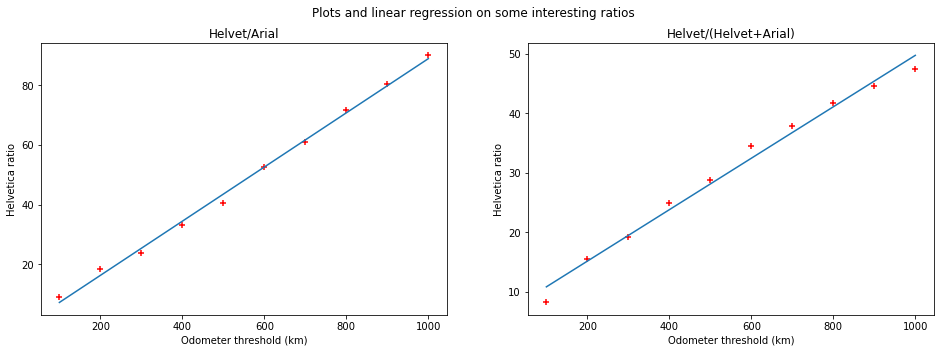

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Plots and linear regression on some interesting ratios')

# left plot: helvet/arial
ax1.plot(X,y_arial)
ax1.scatter(X, ratios_helv_arial, marker='+', color='r')

ax1.set_xlabel('Odometer threshold (km)')
ax1.set_ylabel('Helvetica ratio')
ax1.set_title('Helvet/Arial')


# right plot: helvet/(helvet+arial)
ax2.plot(X,y_tot)
ax2.scatter(X, ratios_helv_tot, marker='+', color='r')

ax2.set_xlabel('Odometer threshold (km)')
ax2.set_ylabel('Helvetica ratio')
_ = ax2.set_title('Helvet/(Helvet+Arial)')

The right plot is clearly not a good fit for a linear regression, but it still showcases how more likely arial font low odometer values are than helvetica font low odometer values.

##### 7.3 Distribution of last 3 digits

In [50]:
# Reduce mod 1000

arial_baseline_3digits = arial_baseline.copy()
helvetica_baseline_3digits = helvetica_baseline.copy()

arial_baseline_3digits["baseline_motorcycle1"]     = arial_baseline_3digits["baseline_motorcycle1"].apply(lambda x: x% 1000)
helvetica_baseline_3digits["baseline_motorcycle1"] = helvetica_baseline_3digits["baseline_motorcycle1"].apply(lambda x: x% 1000)

We plot the following graph side by side to compare the two fonts, but they don't have the same y-axis limits because of the peak in the left plot.\
We have decided not to use a log plot to magnify the size of this peak.

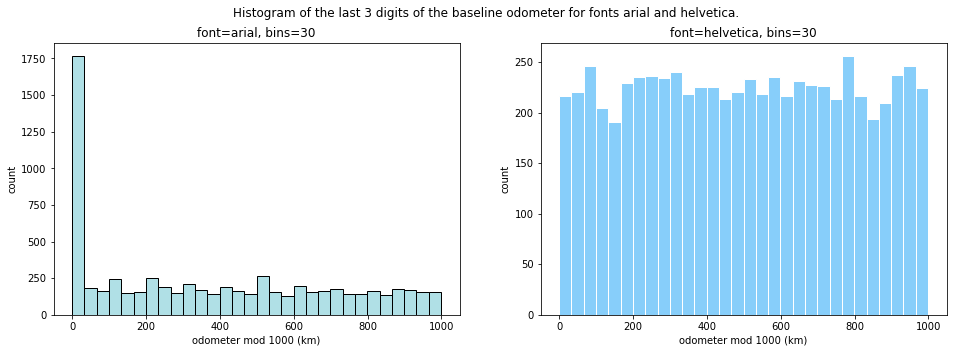

In [51]:
bins = 30

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Histogram of the last 3 digits of the baseline odometer for fonts arial and helvetica.')


# plot 1
ax1.hist(arial_baseline_3digits["baseline_motorcycle1"], color='powderblue', edgecolor='black',\
         bins=bins)

ax1.set_xlabel('odometer mod 1000 (km)')
ax1.set_ylabel('count')

ax1.set_title('font=arial, bins='+str(bins))


# plot 2
ax2.hist(helvetica_baseline_3digits["baseline_motorcycle1"], color='lightskyblue', edgecolor='white',\
         bins=bins, alpha=1.0)

ax2.set_xlabel('odometer mod 1000 (km)')
ax2.set_ylabel('count')

_ = ax2.set_title('font=helvetica, bins='+str(bins))

It is abnormal the two fonts don't share the same distribution. We expand on that in `7.4`

In [52]:
# Take the dataset columns with the updated kilometers and their corresponding id
update_id = df.filter(regex='^update|id' ,axis=1)

# Merge the update kilometers with fonts equal to Arial on "id"
arial_update = update_id.merge(fonts[fonts["font"] == "Arial"],on="id")

arial_update_3d = arial_update.copy()

# Take last 3 digits
arial_update_3d["update_motorcycle1"] = arial_update_3d["update_motorcycle1"].apply(lambda x: x% 1000)

In [53]:
#Merge the update kilometers with fonts equal to Helvetica on "id"
helvetica_update = update_id.merge(fonts[fonts["font"] == "Helvetica"],on="id")

helvetica_update_3d = helvetica_update.copy()
#Take last 3 digits
helvetica_update_3d["update_motorcycle1"] = helvetica_update_3d["update_motorcycle1"].apply(lambda x: x% 1000)

Text(0.5, 1.0, 'Font=helvetica, bins=30')

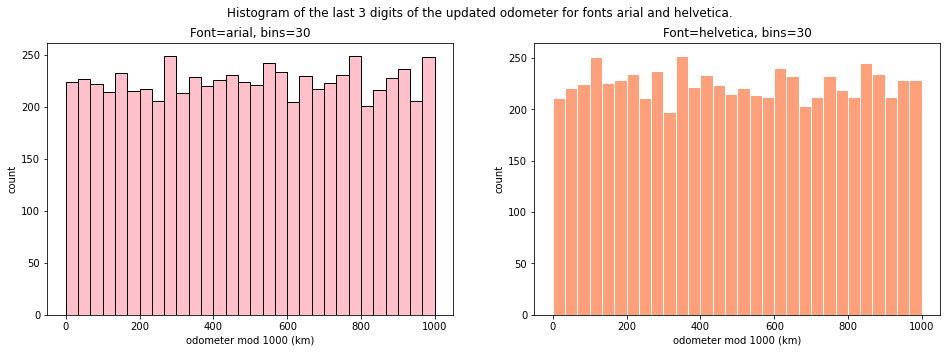

In [54]:
bins = 30

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Histogram of the last 3 digits of the updated odometer for fonts arial and helvetica.')


# plot 1
ax1.hist(arial_update_3d["update_motorcycle1"], color='pink', edgecolor='black',\
         bins=bins)

ax1.set_xlabel('odometer mod 1000 (km)')
ax1.set_ylabel('count')

ax1.set_title('Font=arial, bins='+str(bins))


# plot 2
ax2.hist(helvetica_update_3d["update_motorcycle1"], color='lightsalmon', edgecolor='white',\
         bins=bins)

ax2.set_xlabel('odometer mod 1000 (km)')
ax2.set_ylabel('count')

ax2.set_title('Font=helvetica, bins='+str(bins))

##### 7.4 Why the helvetica rows were fabricated:

1. In the baseline odometers, we have remarked that there strangely are no person who had circulated 0km on data with the Helvetica font, against 117 for data with the Arial font. Expanding on that inconsistency, we have plotted the mileage for both fonts, and analyzed the small mileages (see cell 49). This lead us to the observation that the ratio of helvetica to arial is way smaller than it should be, and the ratio $r=\frac{Helvetica}{Arial}$ even follows a linear function of the odometer for the 1000 smaller odometer values. We do not believe this ratio $r$ is small because the Arial numbers are too big, since it is usual for some people to have low mileage on their motorcycle, or even to let it sit in the garage in order to lower the insurance premium on their later years.

2. Based on our hypothesis that the peak at 0 in the baseline odometer modulo 1000 was caused by the people rounding their odometer numbers, the numbers with the helvetica font should also show that same peak, but they don't (see cell 51), which is another evidence of data tampering. 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

* Let us argue the data has been tampered with: 
When looking at the distance travelled between the baseline and the updated contract (motorcycle 1), we observe that it is no bell curve, which is unlikely (cf for example [this article, p382](https://www.researchgate.net/publication/325085735_Impact_of_Battery_Size_and_Energy_Cost_on_the_Market_Acceptance_of_Blended_Plug-in_Hybrid_Electric_Vehicles)).\
Moreover, when splitting the baseline contract data into Arial and Helvetica fonts, we observe that the Helvetica one has way fewer low values (cells 45, 46), and in particular everyone on Helvetica rows has driven their motorcycle, against 117 on Arial rows who haven’t.\
Finally, the baseline data distribution is correlated with the signature place (cell 20), which was supposed to have been randomized independently of the baseline contract.
In particular, the peaks we’ve assumed to be caused by people rounding their mileage numbers (task 6.3) are simply absent from the baseline data using font Helvetica.\
All these observations make us believe the data has been tampered with. 
* We have made a case for why the helvetica data was fabricated. Here is how it could have happened:
First the lowest values of the baseline odometer, font helvetica, are taken from truncated real data (leading to the aforementioned gap). Then the odometer values for the updated contract were all fabricated, by adding some function to all the data points. This hypothesis is supported by the plots below (cell 55), showing the differences between the udpated and baseline contracts for font helvetica.
* And now to answer the original question:
After analyzing only the Arial font data, which we assume to be clean, we find that there is a significant difference in the reported odometers based on whether we sign at the top or the bottom. And since the mean for contracts signed at the top is smaller, we conclude **signing at the top decreases dishonesty.** (cell 57)


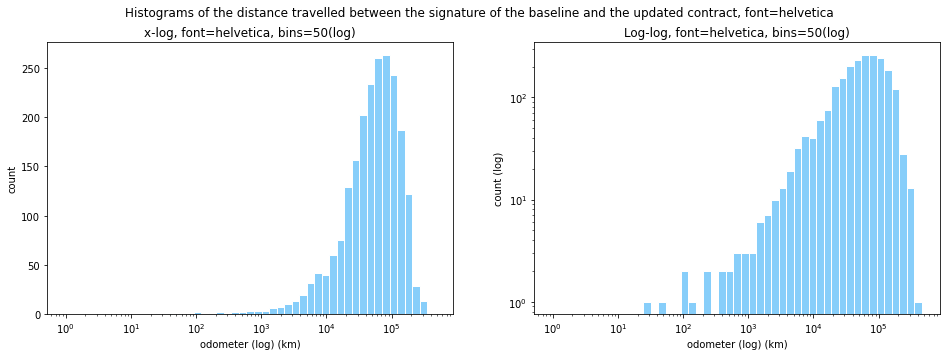

In [55]:
# bins
bin_length = 50
bins = np.logspace(0, np.log10(helvetica_update["update_motorcycle1"].max()), bin_length)
diff_update_helvet = helvetica_update["update_motorcycle1"]-helvetica_baseline["baseline_motorcycle1"]

# frame
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Histograms of the distance travelled between the signature of the baseline and the updated contract, font=helvetica')

# left plot: x-log
values, bins, _ = ax1.hist(diff_update_helvet, color='lightskyblue',\
         edgecolor='white', bins=bins)

ax1.set_xlabel('odometer (log) (km)')
ax1.set_xscale('log')

ax1.set_ylabel('count')

ax1.set_title('x-log, font=helvetica, bins='+str(bin_length)+'(log)')


# right plot: log-log
ax2.hist(diff_update_helvet, color='lightskyblue',\
         edgecolor='white', bins=bins)

ax2.set_xlabel('odometer (log) (km)')
ax2.set_xscale('log')

ax2.set_ylabel('count (log)')
ax2.set_yscale('log')

_ = ax2.set_title('Log-log, font=helvetica, bins='+str(bin_length)+'(log)')

This looks a lot like a power-law ($x \mapsto C.e^{\alpha x}$, $\alpha>1$). To mathematically argue for it, one could use a pre-existing fitting python module to do a linear regression on the log-log data, and see how correct it is. There may even already exist tools for this kind of power laws.

##### 8.3 Does signing at the top decrease dishonesty?

Let's analyze the data that only has Arial font. First let's see the distributions of arial update values with sign at bottom or sign at top

In [56]:
#Extract id and condition of the data
conditions = df.filter(regex="condition|id", axis=1)

#Merge the arial update kilometers with condition equal to Sign Top on "id"
update_top = update_id.merge(conditions[conditions["condition"] == "Sign Top"],on="id")

#Merge the arial update kilometers with condition equal to Sign Bottom on "id"
update_bottom = update_id.merge(conditions[conditions["condition"] == "Sign Bottom"],on="id")

print("top mean:    " + str(update_top["update_average"].mean()))
print("bottom mean: " + str(update_bottom["update_average"].mean()))
print("diff means:  " + str(update_bottom["update_average"].mean() - update_top["update_average"].mean()))

top mean:    85439.57849391409
bottom mean: 98097.21760372823
diff means:  12657.639109814147


Now that we have obtain these two descriptions, let's do the following test hypotheses:
-H0 hypothesis be that signing at the top and signing at the bottom doesn't have a significant difference
-HA hypothesis be that signing at the top does have a significant difference than signing at the bottom

We use a t-test to determine if the mean value of the distributions are significantly different

In [57]:
statistic_font, p_value_font = stats.ttest_ind(update_top["update_average"],update_bottom["update_average"])
print('The difference is statistically significant' if(p_value_font<0.05) else 'The difference is not significant')

The difference is statistically significant


Therefore we can reject the H0 hypothesis, i.e. there is a significant difference in the reported odometers based on whether we sign at the top or the bottom. And since the mean for contracts signed at the top is smaller, we conclude signing at the top *does* decrease dishonesty.